# Librerias

In [1]:
# Importemos las librerias Necesarias:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib
import random
import time


In [2]:
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.neighbors import *


***

In [3]:
# Empecemos por adecuar los datos:
rf = open('pop_failures.csv', 'r')  # Abrimos el archivo

# Obtenemos los nombres de las columnas:
cols = list()
for item in rf.readline()[:-1].split(' '):
    if item is not '':
        cols.append(item)

# Limpiamos el resto de información convirtiéndola en una lista de listas
data = list()
for item in rf.readlines():
    list(item.strip().split())
    data.append(list(item.strip().split()))


In [4]:
# convertimos lo anterior en un DataFrame
df = pd.DataFrame(data, columns=cols)

# convirtamos la información a su tipo correspondiente:
for col in cols:
    df[col] = pd.to_numeric(df[col])

df.head()


,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [5]:
# Analicemos el Data Set
df.describe()


,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2.000000,90.500000,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,...,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,0.817254,52.008901,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,...,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,1.000000,1.000000,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,...,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,1.000000,45.750000,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,...,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,2.000000,90.500000,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,...,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,3.000000,135.250000,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,...,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,3.000000,180.000000,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,...,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


In [6]:
# Analicemos si la variable objetivo está equilibrada, aprovecharemos que nos encontramos ante un problema de clasificación binaria:
print(
    f'Outcome positivo:{df[cols[-1]].sum()}\nOutcome negativo:{len(df)-df[cols[-1]].sum()}')


Outcome positivo:494
Outcome negativo:46


Vemos que la variable objetivo no está equilibrada por lo que es de esperar que los modelos tiendan al overfitting al ser entrenados con este data set.

Antes de continuar y dado que este problema consta de 21 variables, haremos una selección de las mismas:

In [7]:
# dada la naturaleza del data set, emplearemos mutual info classif:
# para que los split no se repitan al ejecutar la celda
seed = random.seed(time.time())

# hagamos la separacion de datos:
X = df.drop(cols[-1], axis=1)
y = df[cols[-1]]

sel = mutual_info_classif(X, y, random_state=seed)
for i in range(len(sel)):
    if sel[i] < 0.01:  # Filtramos las variables por su peso
        df = df.drop(cols[i], axis=1)

cols = df.columns
df.head()


,vconst_corr,vconst_2,efficiency_factor,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,outcome
0,0.859036,0.927825,0.245675,0.997518,0.448620,0.307522,0
1,0.606041,0.457728,0.616870,0.845247,0.864152,0.346713,1
2,0.997600,0.373238,0.679355,0.718441,0.924775,0.315371,1
3,0.783408,0.104055,0.471463,0.362751,0.912819,0.977971,1
4,0.406250,0.513199,0.551543,0.650223,0.522261,0.043545,1


In [8]:
# creemos los conjuntos train y test:
# dada la naturaleza del data set, emplearemos mutual info classif:
# para que los split no se repitan al ejecutar la celda
seed = random.seed(time.time())

# hagamos la separacion de datos:
X = df.drop(cols[-1], axis=1)
y = df[cols[-1]]

# creemos los splits:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=seed)
# Empleando Kfold queda mas equilibrado el spliteo


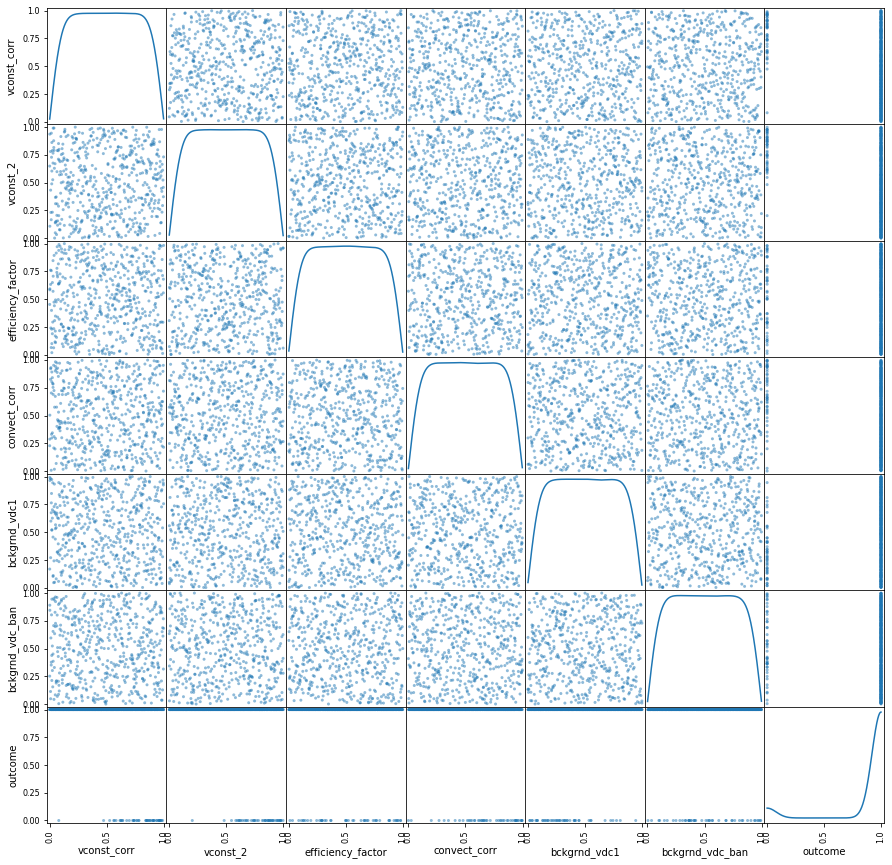

In [9]:
# Antes de normalizar las variables analicemos si hay outliers o patrones atipicos:
matrix = pd.plotting.scatter_matrix(
    df, alpha=0.5, figsize=(15, 15), diagonal='kde')


Se puede apreciar que en realidad no existen outliers, pero tampoco se puede decir que se aprecie una clasificación notable.

In [10]:
# normalicemos el conjunto:
# ajustemos el modelo a los datos que tenemos:
scal = MinMaxScaler().fit(X_train)

# Normalicemos los conjuntos:
X_train = scal.transform(X_train)
X_test = scal.transform(X_test)


**Regresión Lógistica:**

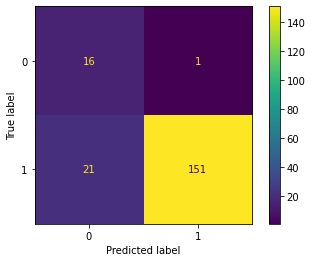

In [14]:
model = LogisticRegression(class_weight='balanced').fit(
    X_train, y_train)  # nota en class_weight
pred_LinR = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, pred_LinR)).plot()
matplotlib.pyplot.show()


In [16]:
# Evaluemos el modelo mediante el accuracy_score:
print(f'Precision del modelo: {balanced_accuracy_score(y_test, pred_LinR)}')


Precision del modelo: 0.9095417236662107


Se puede observar que el modelo es relativamente preciso, sin embargo, se aprecia en la matriz de confusión que el modelo presenta un overfit bastante acentuado debido al la falta de equilibrio en los datos. También se aprecia que en ciertas ejecuciones del código el overfitting parece desaparecer y aumenta la precisión del modelo.

**KNN**

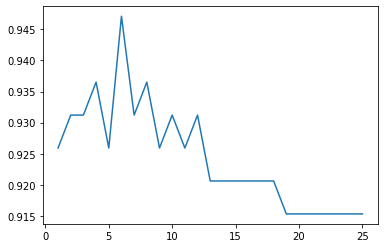

In [13]:
# realizaremos el calculo para una serie de valores de k:
pred = list()
k = list()
for i in range(25):
    model = KNeighborsClassifier(n_neighbors=i+1, metric='euclidean')
    model.fit(X_train, y_train)
    pred.append(accuracy_score(y_test, model.predict(X_test)))
    k.append(i+1)

# Mostremos los resultados como gráficas
matplotlib.pyplot.plot(k, pred)
matplotlib.pyplot.show()


    Se puede apreciar en la gráfica que para valores de k cercanos a 15 el modelo parece aumentar su precisión y vistos los valores de precisión obtenidos podríamos inferir que no existe overfitting a diferencia del modelo anterior.

***

# Notas:

> Nota 1

# Bibliografia:

   * Elemento bibliografico 1
   * Elemento bibliografico 2